 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("usyd-syd-fin-pt-09-2021-u-c/week_04/homework/Starter_Code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(
whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna().copy()
#whale_returns.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
csv_path = Path("usyd-syd-fin-pt-09-2021-u-c/week_04/homework/Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns = algo_returns.sort_index()
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna().copy()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
csvpath = Path("usyd-syd-fin-pt-09-2021-u-c/week_04/homework/Starter_Code/Resources/sp500_history.csv")
SP500 = pd.read_csv(csvpath, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP500 = SP500.sort_index()
SP500

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [9]:
# Check Data Types
SP500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
SP500['Close'] = SP500['Close'].str.replace('$','')
SP500['Close'] = SP500['Close'].str.replace(',','')
SP500['Close'] = SP500['Close'].astype(float)
SP500['Close']

C:\Users\Michael\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: float64

In [11]:
#Confirm data type of "Close"
SP500['Close'].dtype

dtype('float64')

In [12]:
# Calculate Daily Returns
SP500_returns = SP500.pct_change()
SP500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls
SP500_returns = SP500_returns.dropna().copy()
SP500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename `Close` Column to be specific to this portfolio.
SP500_returns = SP500_returns.rename(columns = {'Close':'S&P 500'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
SP500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
whale_returns.reset_index(drop=True,inplace=True)
algo_returns.reset_index(drop=True,inplace=True)
SP500_returns.reset_index(drop=True,inplace=True)
combined_df = pd.concat([whale_returns, algo_returns, SP500_returns], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
#combined_df.columns = ['Whale_Returns', 'Algo_Returns', 'SP500']
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
0,-0.001266,-0.004981,-0.000496,-0.006569,0.001745,NaN,0.000872
1,0.002230,0.003241,-0.002534,0.004213,0.003978,NaN,0.003624
2,0.004016,0.004076,0.002355,0.006726,0.004464,NaN,0.007174
3,-0.007905,-0.003574,-0.008481,-0.013098,0.005692,NaN,-0.000322
4,0.000582,0.004225,0.005843,-0.001652,0.005292,NaN,-0.003457


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:>

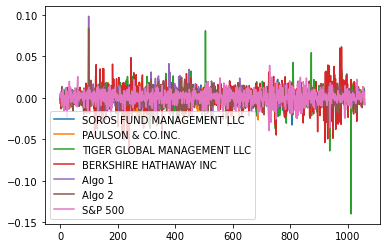

In [17]:
# Plot daily returns of all portfolios
combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:>

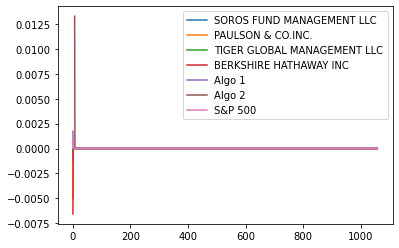

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = combined_df.cumprod()
# Plot cumulative returns
cumulative_returns.plot()

<AxesSubplot:>

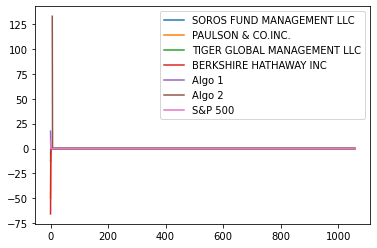

In [19]:
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

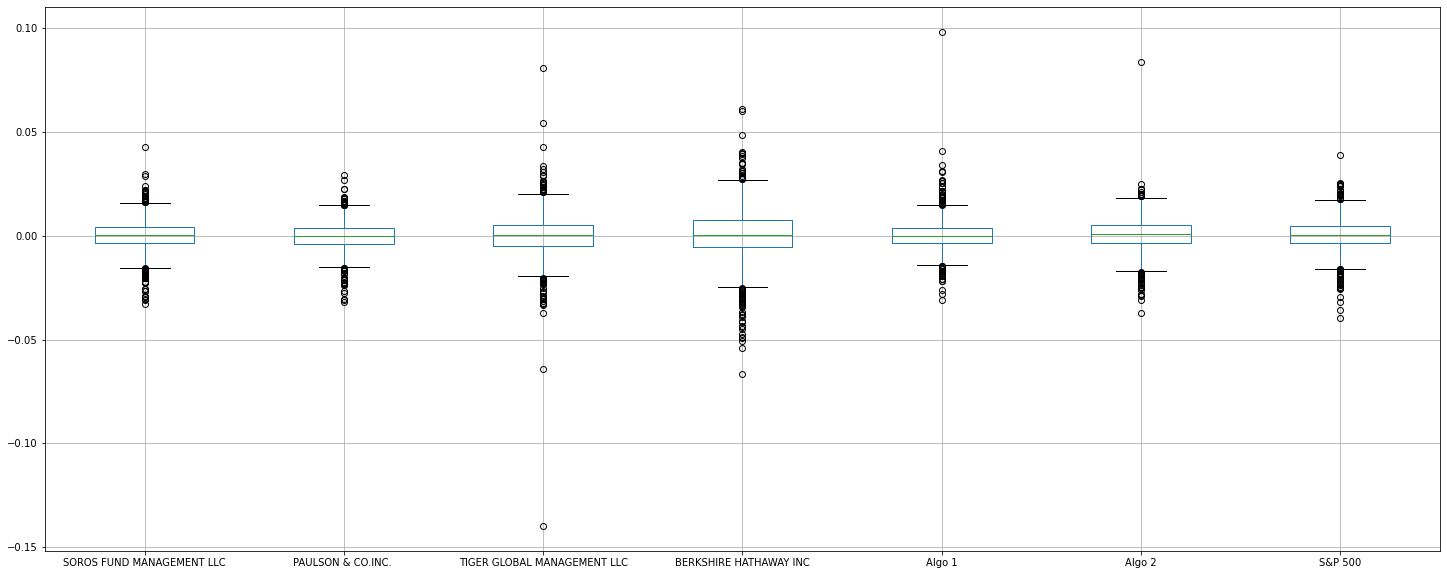

In [20]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(25,10))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
volatility = combined_df.std()
volatility

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
Algo 1                         0.007731
Algo 2                         0.008269
S&P 500                        0.008131
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
volatility_SP500 = volatility['S&P 500']
# Determine which portfolios are riskier than the S&P 500
risky_portfolios = volatility <= volatility_SP500
risky_portfolios

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.               True
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC         False
Algo 1                          True
Algo 2                         False
S&P 500                         True
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
annualised_SD = volatility * np.sqrt(252)
annualised_SD.sort_values(inplace=True)
annualised_SD

PAULSON & CO.INC.              0.110754
Algo 1                         0.122728
SOROS FUND MANAGEMENT LLC      0.124487
S&P 500                        0.129078
Algo 2                         0.131268
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
for portfolio in combined_df:
    daily_sd = portfolio * np.sqrt(252)

#volatility = combined_std(window=21).mean()

# Plot the rolling standard deviation
#ax1 = volatility.plot(figsize=(10,10))


TypeError: can't multiply sequence by non-int of type 'numpy.float64'

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = cumulative_returns.corr()

# Display de correlation matrix
correlation

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio
berkshire_covariance = cumulative_returns['BERKSHIRE HATHAWAY INC'].cov(cumulative_returns['S&P 500'])
berkshire_covariance
# Calculate variance of S&P 500
variance = cumulative_returns['S&P 500'].var()
variance

In [ ]:
# Computing beta
berkshire_beta = berkshire_covariance / variance
berkshire_beta

In [ ]:
# Plot beta trend
ax = berkshire_beta.plot(figsize(20,10), title='Rolling 30-Day Beta of Berkshire Hathaway stock')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
berkshire_rolling = berkshire_beta.ewm(halflife=21)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
correlation = combined_df.corr()
sharpe_ratios = (correlation.mean()*252) / (correlation.std() * np.sqrt(252))
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(20,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

#The Algo strategies outperformend the S&P 500 over the period as they had a higher Sharpe Ratio however, did underperformed the Whale Portfolios with a lower Sharpe Ratio. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
pwd

In [26]:
# Reading data from 1st stock
goog_data = Path("usyd-syd-fin-pt-09-2021-u-c/week_04/homework/Starter_Code/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [27]:
# Reading data from 2nd stock
aapl_data = Path("usyd-syd-fin-pt-09-2021-u-c/week_04/homework/Starter_Code/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [28]:
# Reading data from 3rd stock
cost_data = Path("usyd-syd-fin-pt-09-2021-u-c/week_04/homework/Starter_Code/Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_data, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [39]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df, aapl_df, cost_df], axis='rows', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-11,GOOG,1098.26
2018-05-11,AAPL,188.59
2018-05-14,GOOG,1100.20
2018-05-14,AAPL,188.15


In [40]:
# Reset Date index
combined_df = combined_df.reset_index()
combined_df

,Trade DATE,Symbol,NOCP
0,2018-05-11,COST,195.76
1,2018-05-11,GOOG,1098.26
2,2018-05-11,AAPL,188.59
3,2018-05-14,GOOG,1100.20
4,2018-05-14,AAPL,188.15
...,...,...,...
745,2019-05-08,AAPL,202.90
746,2019-05-08,GOOG,1166.27
747,2019-05-09,COST,243.47
748,2019-05-09,AAPL,200.72


In [60]:
# Reorganize portfolio data by having a column per symbol
combined_df_group = pd.combined_df({'Trade Date', 'NOCP'}, ['GOOG', 'AAPL', 'COST'])

AttributeError: module 'pandas' has no attribute 'combined_df'

In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!